In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np  
import seaborn as sns  
import tensorflow as tf  
from tensorflow import keras 
from keras import layers
from sklearn.ensemble import RandomForestRegressor  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold


In [2]:
#Load in CAT files
df_mag = pd.read_csv('NEP14_CohenMAGS.cat',header=5,sep=r'\s+')
df_sed = pd.read_csv('NEP14_CohenSED.cat',header=3,sep=r'\s+')

#Clean Columns
#MAG
mag_col_names = list(df_mag.columns.drop(['#','(deg)']))
mag_col_names[1] = 'RA(deg)'
df_mag_clean = df_mag.iloc[:,:-2].set_axis(mag_col_names,axis=1).dropna()
df_mag_clean['ID'] = df_mag_clean['ID'].astype(float)
display(df_mag_clean)

#SED
sed_col_names = [s.replace(',', '') for s in list(df_sed.columns.drop(['#','sq.,']))]
sed_col_names[6] = 'chi sq.'
df_sed_clean = df_sed.iloc[1:,:-2].set_axis(sed_col_names,axis=1).reset_index(drop=True).dropna()
df_sed_clean['ID'] = df_sed_clean['ID'].astype(float)
display(df_sed_clean)
# Merge on "ID"
df_merged = df_mag_clean.merge(df_sed_clean, on="ID",how='right').astype(float)
df_merged = df_merged.loc[df_merged['F444W'] <=30]
df_merged = df_merged.loc[~np.isinf(df_merged['Log10(SSFR)'].astype(float))]
display((df_merged))

,ID,RA(deg),Dec(deg),F090W,F115W,F150W,F200W,F277W,F356W,F410M,F444W,eF090W,eF115W,eF150W,eF200W,eF277W,eF356W,eF410M,eF444W
0,1.0,260.718976,65.711171,18.7847,18.6773,18.8318,18.9775,19.6117,19.8170,20.2598,20.3863,0.0700,0.0701,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700
1,2.0,260.731025,65.710601,18.3673,18.1124,17.9475,17.8704,18.0502,18.3024,18.4486,18.5508,0.0700,0.0700,0.0700,0.0702,0.0700,0.0700,0.0700,0.0700
2,3.0,260.671726,65.711675,17.7597,17.2200,16.8639,16.6053,16.6891,17.0728,17.0368,17.2670,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0702,0.1107
3,4.0,260.724918,65.709605,21.6962,21.4863,21.3460,21.4604,23.0741,23.1244,23.2145,23.3691,0.0701,0.0731,0.0727,0.0701,0.0703,0.0702,0.0716,0.0705
4,5.0,260.751843,65.708582,25.5848,25.5662,25.5087,25.3979,24.7714,24.7934,25.1194,24.9991,0.0815,0.0809,0.0787,0.0757,0.0705,0.0704,0.0721,0.0712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37863,39117.0,260.672816,65.904928,22.0350,21.9733,21.8381,21.7456,21.8421,22.3119,22.4508,22.4028,0.0701,0.0700,0.0700,0.0700,0.0700,0.0700,0.0701,0.0700
37864,36603.0,260.666303,65.901720,28.0913,27.6933,27.2214,26.6518,26.6035,26.7834,26.6136,26.7546,0.3106,0.2174,0.1472,0.0950,0.0755,0.0761,0.0844,0.0818
37865,41620.0,260.661086,65.906960,27.4219,27.4504,27.5667,27.2882,26.8604,26.9123,26.9335,27.0008,0.1446,0.1462,0.1491,0.1110,0.0760,0.0756,0.0875,0.0858
37866,38911.0,260.702667,65.875949,27.4436,26.9181,26.2983,26.2320,26.1292,26.3350,26.4955,26.4607,0.1500,0.1068,0.0811,0.0773,0.0719,0.0724,0.0813,0.0762


,ID,RA(J2000),DEC(J2000),z_m1(EAZY),log10(mass),log10(age),chi sq.,Log10(SSFR),Log10(Tau),A_V,nfilt,F444W_AB
0,1.0,260.718976069,65.711171400,0.075000,8.024576,-2.040001,7.724554,1.827012,-2.000000,0.000000,8,20.3863
1,2.0,260.731024544,65.710600509,0.446000,10.559864,-2.220000,0.866112,2.184449,-1.428291,2.400000,8,18.5508
2,3.0,260.671726138,65.711675312,0.259000,10.944576,-0.843454,3.219007,-4.227740,-2.000000,1.800000,8,17.2670
3,4.0,260.724917893,65.709605249,0.018000,5.689755,-2.080001,141.343780,1.886938,-2.000000,0.000000,8,23.3691
4,5.0,260.751843111,65.708582257,4.715000,9.813772,-0.693453,17.567767,-0.052254,-1.142668,0.000000,8,24.9991
...,...,...,...,...,...,...,...,...,...,...,...,...
37863,39117.0,260.672816384,65.904928329,0.454000,8.765012,-1.043455,4.177360,1.043258,2.000000,0.200000,8,22.4028
37864,36603.0,260.666302552,65.901720439,0.499000,7.283634,-2.200001,6.419984,2.127079,-1.714443,4.000000,8,26.7546
37865,41620.0,260.661086119,65.906960439,4.786000,8.939743,-0.893456,2.477451,-0.045416,-1.428291,0.000000,8,27.0008
37866,38911.0,260.702667433,65.875948602,0.423000,7.312332,-2.220000,5.361995,2.150443,-1.714443,3.600000,8,26.4607


,ID,RA(deg),Dec(deg),F090W,F115W,F150W,F200W,F277W,F356W,F410M,...,DEC(J2000),z_m1(EAZY),log10(mass),log10(age),chi sq.,Log10(SSFR),Log10(Tau),A_V,nfilt,F444W_AB
0,1.0,260.718976,65.711171,18.7847,18.6773,18.8318,18.9775,19.6117,19.8170,20.2598,...,65.711171,0.075,8.024576,-2.040001,7.724554,1.827012,-2.000000,0.0,8.0,20.3863
1,2.0,260.731025,65.710601,18.3673,18.1124,17.9475,17.8704,18.0502,18.3024,18.4486,...,65.710601,0.446,10.559864,-2.220000,0.866112,2.184449,-1.428291,2.4,8.0,18.5508
2,3.0,260.671726,65.711675,17.7597,17.2200,16.8639,16.6053,16.6891,17.0728,17.0368,...,65.711675,0.259,10.944576,-0.843454,3.219007,-4.227740,-2.000000,1.8,8.0,17.2670
3,4.0,260.724918,65.709605,21.6962,21.4863,21.3460,21.4604,23.0741,23.1244,23.2145,...,65.709605,0.018,5.689755,-2.080001,141.343780,1.886938,-2.000000,0.0,8.0,23.3691
4,5.0,260.751843,65.708582,25.5848,25.5662,25.5087,25.3979,24.7714,24.7934,25.1194,...,65.708582,4.715,9.813772,-0.693453,17.567767,-0.052254,-1.142668,0.0,8.0,24.9991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37719,39117.0,260.672816,65.904928,22.0350,21.9733,21.8381,21.7456,21.8421,22.3119,22.4508,...,65.904928,0.454,8.765012,-1.043455,4.177360,1.043258,2.000000,0.2,8.0,22.4028
37720,36603.0,260.666303,65.901720,28.0913,27.6933,27.2214,26.6518,26.6035,26.7834,26.6136,...,65.901720,0.499,7.283634,-2.200001,6.419984,2.127079,-1.714443,4.0,8.0,26.7546
37721,41620.0,260.661086,65.906960,27.4219,27.4504,27.5667,27.2882,26.8604,26.9123,26.9335,...,65.906960,4.786,8.939743,-0.893456,2.477451,-0.045416,-1.428291,0.0,8.0,27.0008
37722,38911.0,260.702667,65.875949,27.4436,26.9181,26.2983,26.2320,26.1292,26.3350,26.4955,...,65.875949,0.423,7.312332,-2.220000,5.361995,2.150443,-1.714443,3.6,8.0,26.4607


In [3]:
# Define input features and target variables
input_features = ["F090W", "F150W", "F200W", "F277W", "F356W", "F410M", "F444W", "z_m1(EAZY)"]
target_variables = ["log10(mass)", "log10(age)", "Log10(SSFR)", "Log10(Tau)", "A_V", "chi sq."]

# Split data into train and test sets
X = df_merged[input_features]
y = df_merged[target_variables]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Train the Random Forest model
regr = RandomForestRegressor()
regr.fit(X_train_scaled, y_train_scaled)

# Make predictions
predictions_scaled = regr.predict(X_test_scaled)

# Inverse transform the predictions back to original scale
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test_original, predictions)
r2 = r2_score(y_test_original, predictions)

# Output the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 97.38222171662012
R-squared: 0.5828561106320387


GridSearchCV

In [4]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'max_features': ['auto', 'sqrt'],  # Number of features per split
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV to training data
grid_search.fit(X_train_scaled, y_train_scaled)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate on test set
predictions_scaled = best_rf.predict(X_test_scaled)

# Inverse transform predictions
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Compute metrics
mse = mean_squared_error(y_test_original, predictions)
r2 = r2_score(y_test_original, predictions)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\AstroNoah\miniconda3\envs\ml_env\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
228 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\AstroNoah\miniconda3\envs\ml_env\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\AstroNoah\miniconda3\envs\ml_env\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\AstroNoah\miniconda3\envs\ml_env\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_par

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Mean Squared Error: 95.12387568396224
R-squared: 0.5722865617711264


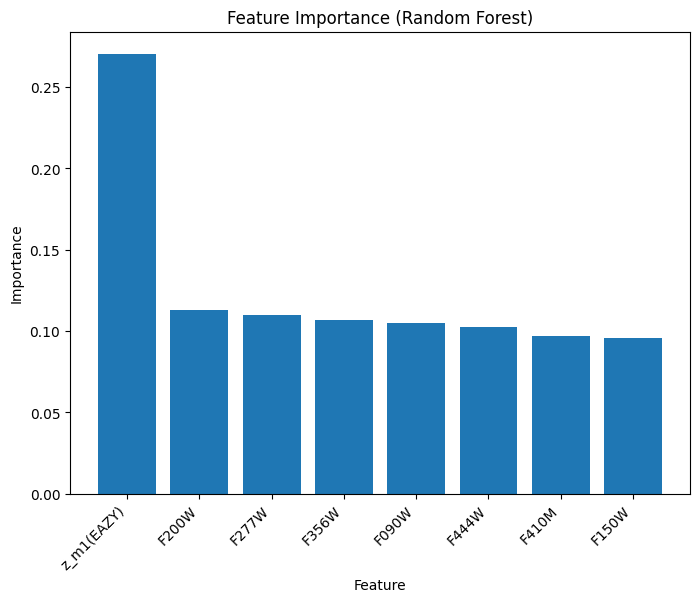

In [5]:
# Get feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(input_features)), importances[indices], align="center")
plt.xticks(range(len(input_features)), np.array(input_features)[indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()

SVM (SVR) for Log10(mass)

In [6]:
df_filtered = df_merged.loc[df_merged['F444W'] <= 25]

#Define input features and target variables
input_features = ["F090W", "F150W", "F200W", "F277W", "F356W", "F410M", "F444W", "z_m1(EAZY)"]
target_variables = ["log10(mass)", "log10(age)", "Log10(SSFR)", "Log10(Tau)", "A_V", "chi sq."]

# Step 3: Prepare input/output datasets
X = df_filtered[input_features]
y = df_filtered[target_variables]

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize input and output variables
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Step 6: Train an SVM model (RBF Kernel)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # Adjust C and gamma if needed
svr.fit(X_train_scaled, y_train_scaled[:, 0])  # Training on first target variable for now (log10(mass))

# Step 7: Make predictions
predictions_scaled = svr.predict(X_test_scaled)

# Reshape predictions
predictions_scaled = predictions_scaled.reshape(-1, 1)

# Step 8: Inverse transform predictions to original scale
predictions = scaler_y.inverse_transform(np.hstack([predictions_scaled, np.zeros((predictions_scaled.shape[0], y_train.shape[1] - 1))]))[:, 0]

# Step 9: Evaluate the model
mse_svm = mean_squared_error(y_test["log10(mass)"], predictions)
r2_svm = r2_score(y_test["log10(mass)"], predictions)

# Print results
print(f'SVM Mean Squared Error: {mse_svm}')
print(f'SVM R-squared: {r2_svm}')

SVM Mean Squared Error: 0.09216751028311217
SVM R-squared: 0.9117801833176159


Now we train seperate models for all target variables, SVM only used to predict one output at a time

In [7]:
df_filtered = df_merged.loc[df_merged['F444W'] <= 25]

# Define input features and target variables
input_features = ["F090W", "F150W", "F200W", "F277W", "F356W", "F410M", "F444W", "z_m1(EAZY)"]
target_variables = ["log10(mass)", "log10(age)", "Log10(SSFR)", "Log10(Tau)", "A_V", "chi sq."]

# Prepare input/output datasets
X = df_filtered[input_features]
y = df_filtered[target_variables]

# Train/test split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize input and output variables
scaler_X_svm = StandardScaler()
scaler_y_svm = StandardScaler()

X_train_scaled_svm = scaler_X.fit_transform(X_train_svm)
X_test_scaled_svm = scaler_X.transform(X_test_svm)

y_train_scaled_svm = scaler_y.fit_transform(y_train_svm)
y_test_scaled_svm = scaler_y.transform(y_test_svm)

# Train an SVM model for each target variable
svr_models = {}
predictions_scaled = []

for i, target in enumerate(target_variables):
    svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # Default parameters for now
    svr.fit(X_train_scaled_svm, y_train_scaled_svm[:, i])
    svr_models[target] = svr

    # Predict and store scaled predictions
    pred_scaled = svr.predict(X_test_scaled_svm)
    predictions_scaled.append(pred_scaled)

# Convert predictions list to array and reshape
predictions_scaled = np.array(predictions_scaled).T  # Shape: (samples, targets)

# Inverse transform predictions to original scale
predictions = scaler_y.inverse_transform(predictions_scaled)

#Evaluate the model for each target variable
mse_results = {}
r2_results = {}

for i, target in enumerate(target_variables):
    mse_results[target] = mean_squared_error(y_test_svm[target], predictions[:, i])
    r2_results[target] = r2_score(y_test_svm[target], predictions[:, i])

# Print results
print("SVM Performance for Each Target Variable:")
for target in target_variables:
    print(f"{target} - MSE: {mse_results[target]:.5f}, R²: {r2_results[target]:.5f}")

SVM Performance for Each Target Variable:
log10(mass) - MSE: 0.09217, R²: 0.91178
log10(age) - MSE: 0.70417, R²: 0.31520
Log10(SSFR) - MSE: 194.60233, R²: 0.02085
Log10(Tau) - MSE: 2.06857, R²: 0.00065
A_V - MSE: 0.63387, R²: 0.63760
chi sq. - MSE: 538.03893, R²: 0.77303


In [8]:
# Define the parameter grid for fine-tuning
param_grid = {
    'C': [1, 10, 50, 100, 200, 500, 1000],  # Wide range of C values
    'gamma': ['scale', 0.001, 0.01, 0.1, 0.5, 1],  # Various levels of complexity
    'epsilon': [0.001, 0.01, 0.1, 0.5, 1, 2]  # Different tolerance levels
}

# Initialize SVR model
svr = SVR(kernel='rbf')

# Run GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV to training data
grid_search.fit(X_train_scaled_svm, y_train_scaled_svm[:, 0])  # Only optimizing for log10(mass)

# Get the best parameters
best_params = grid_search.best_params_
best_svr = grid_search.best_estimator_

# Make predictions with the best model
predictions_scaled = best_svr.predict(X_test_scaled_svm).reshape(-1, 1)

# Inverse transform predictions to original scale
predictions = scaler_y.inverse_transform(np.hstack([predictions_scaled, np.zeros((predictions_scaled.shape[0], y_train_svm.shape[1] - 1))]))[:, 0]

y_test_original_svm = scaler_y.inverse_transform(y_test_scaled_svm)

# Evaluate the best model
mse_best = mean_squared_error(y_test_svm["log10(mass)"], predictions)
r2_best = r2_score(y_test_svm["log10(mass)"], predictions)

# Print best parameters and performance
print(f'Best Parameters: {best_params}')
print(f'Optimized SVM Mean Squared Error: {mse_best}')
print(f'Optimized SVM R-squared: {r2_best}')

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Best Parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 0.5}
Optimized SVM Mean Squared Error: 0.07866405434981553
Optimized SVM R-squared: 0.9247052629183867


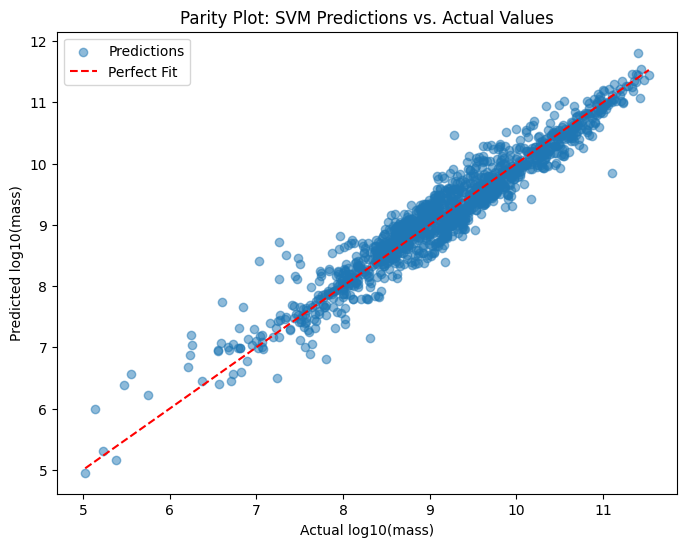

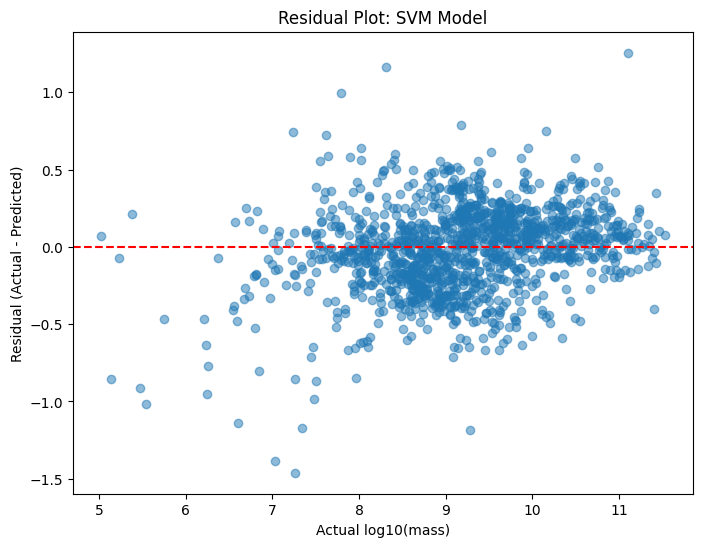

In [9]:
# Scatter plot: Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_svm["log10(mass)"], predictions, alpha=0.5, label="Predictions")
plt.plot([min(y_test_svm["log10(mass)"]), max(y_test_svm["log10(mass)"])], 
         [min(y_test_svm["log10(mass)"]), max(y_test_svm["log10(mass)"])], 
         'r--', label="Perfect Fit")

plt.xlabel("Actual log10(mass)")
plt.ylabel("Predicted log10(mass)")
plt.title("Parity Plot: SVM Predictions vs. Actual Values")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
residuals = y_test_svm["log10(mass)"] - predictions
plt.scatter(y_test_svm["log10(mass)"], residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel("Actual log10(mass)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot: SVM Model")
plt.show()

Multi-Layer Perceptron (MLP)

In [10]:
# Step 1: Filter the dataset for bright objects (F444W ≤ 25)
df_filtered = df_merged.loc[df_merged['F444W'] <= 30]

# Step 2: Define input features, target variable, and error columns
input_features = ["F090W", "F150W", "F200W", "F277W", "F356W", "F410M", "F444W", "z_m1(EAZY)"]
error_columns = ["eF090W", "eF115W", "eF150W", "eF200W", "eF277W", "eF356W", "eF410M", "eF444W"]
target_variable = "log10(mass)"

# Step 3: Prepare input/output datasets
X = df_filtered[input_features]
X_errors = df_filtered[error_columns]  # Magnitude errors as weights
y = df_filtered[[target_variable]]

# Step 4: Train/test split
X_train_mlp, X_test_mlp, X_err_train, X_err_test, y_train_mlp, y_test_mlp = train_test_split(
    X, X_errors, y, test_size=0.3, random_state=42)

# Step 5: Standardize inputs and output
scaler_X_mlp = StandardScaler()
scaler_y_mlp = StandardScaler()
scaler_X_err = StandardScaler()  # Normalize error weights too

X_train_scaled_mlp = scaler_X_mlp.fit_transform(X_train_mlp)
X_test_scaled_mlp = scaler_X_mlp.transform(X_test_mlp)

y_train_scaled_mlp = scaler_y_mlp.fit_transform(y_train_mlp)
y_test_scaled_mlp = scaler_y_mlp.transform(y_test_mlp)

X_err_train_scaled = scaler_X_err.fit_transform(X_err_train)
X_err_test_scaled = scaler_X_err.transform(X_err_test)

# Step 6: Compute Sample Weights
# Average magnitude errors for each sample (so we have one weight per row)
sample_weights = np.clip(1 / (np.mean(X_err_train_scaled, axis=1) + 1e-6), 0.1, 10)

# Step 7: Define MLP Model
input_layer = keras.Input(shape=(X_train_scaled.shape[1],))

hidden1 = layers.Dense(128, activation='relu')(input_layer)
hidden2 = layers.Dense(64, activation='relu')(hidden1)
hidden3 = layers.Dense(32, activation='relu')(hidden2)

output_layer = layers.Dense(1)(hidden3)  # Single output for `log10(mass)`

model = keras.Model(inputs=input_layer, outputs=output_layer)

# Step 8: Compile the Model (No custom loss needed anymore)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])

# Step 9: Train the Model using Sample Weights
history = model.fit(X_train_scaled_mlp, y_train_scaled_mlp, 
                    validation_data=(X_test_scaled_mlp, y_test_scaled_mlp), 
                    sample_weight=sample_weights,  # <--- Pass the weights here
                    epochs=100, batch_size=32, verbose=1)

# Step 10: Make Predictions
y_pred_scaled = model.predict(X_test_scaled_mlp)

# Convert predictions back to original scale
y_pred = scaler_y_mlp.inverse_transform(y_pred_scaled)
y_test_original = scaler_y_mlp.inverse_transform(y_test_scaled_mlp)

# Remove NaN values before evaluation
mask = ~np.isnan(y_pred).flatten() & ~np.isnan(y_test_original).flatten()
y_pred_clean = y_pred[mask]
y_test_clean = y_test_original[mask]

# Compute metrics only on valid data
mse_nn = mean_squared_error(y_test_clean, y_pred_clean)
r2_nn = r2_score(y_test_clean, y_pred_clean)

print(f'Neural Network Mean Squared Error: {mse_nn}')
print(f'Neural Network R-squared: {r2_nn}')


Epoch 1/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2776 - mae: 0.6002 - val_loss: 0.2188 - val_mae: 0.3673
Epoch 2/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0733 - mae: 0.3569 - val_loss: 0.1939 - val_mae: 0.3422
Epoch 3/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0727 - mae: 0.3429 - val_loss: 0.1856 - val_mae: 0.3380
Epoch 4/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0625 - mae: 0.3274 - val_loss: 0.1670 - val_mae: 0.3095
Epoch 5/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0637 - mae: 0.3151 - val_loss: 0.1627 - val_mae: 0.3101
Epoch 6/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0560 - mae: 0.3008 - val_loss: 0.1450 - val_mae: 0.2869
Epoch 7/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0544 - mae: 0.2901 - val_loss: 0.1423 - val_mae: 0.2869
Epoch 8/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0536 - mae: 0.2841 - val_loss: 0.1370 - val_mae: 0.2836
Epoch 9/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/


🔥 **SVM Overfitting Check** 🔥
Train MSE: 0.1120, Train R²: 0.9480
Test MSE: 0.1472, Test R²: 0.9340

📊 **SVM Cross-Validation Scores (5-Fold)**: [0.88277716 0.89615974 0.91515987 0.90774265 0.90656993]
Mean CV R²: 0.9017 ± 0.0112
772/772 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step

🔥 **Neural Network Overfitting Check** 🔥
Train MSE: 0.1321, Train R²: 0.9386
Test MSE: 0.1492, Test R²: 0.9331


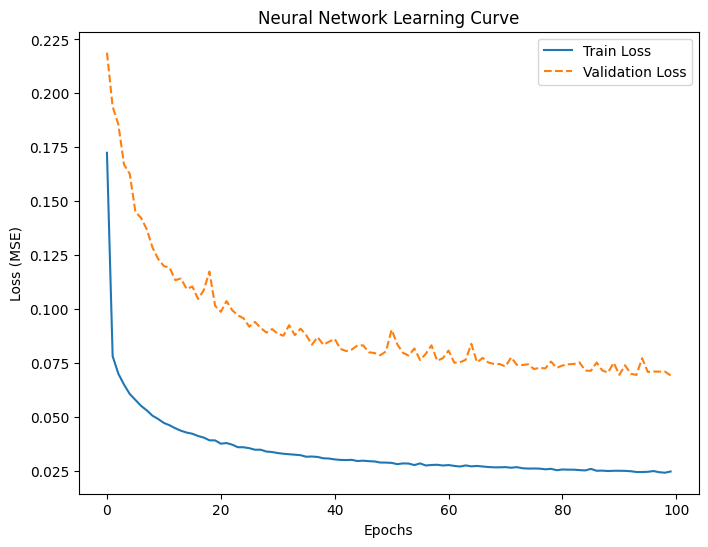

In [11]:
# Train/test split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Standardize only `log10(mass)` for SVM
scaler_X_svm = StandardScaler()
scaler_y_svm = StandardScaler()

X_train_scaled_svm = scaler_X_svm.fit_transform(X_train_svm)
X_test_scaled_svm = scaler_X_svm.transform(X_test_svm)

y_train_scaled_svm = scaler_y_svm.fit_transform(y_train_svm[["log10(mass)"]])
y_test_scaled_svm = scaler_y_svm.transform(y_test_svm[["log10(mass)"]])

# Train the best SVM model
best_svr.fit(X_train_scaled_svm, y_train_scaled_svm.ravel())

# Predict and inverse transform
y_train_pred_svm = best_svr.predict(X_train_scaled_svm)
y_test_pred_svm = best_svr.predict(X_test_scaled_svm)

y_train_pred_svm = scaler_y_svm.inverse_transform(y_train_pred_svm.reshape(-1, 1))
y_test_pred_svm = scaler_y_svm.inverse_transform(y_test_pred_svm.reshape(-1, 1))

# Compute new Train & Test performance
mse_train_svm = mean_squared_error(y_train_svm["log10(mass)"], y_train_pred_svm)
r2_train_svm = r2_score(y_train_svm["log10(mass)"], y_train_pred_svm)

mse_test_svm = mean_squared_error(y_test_svm["log10(mass)"], y_test_pred_svm)
r2_test_svm = r2_score(y_test_svm["log10(mass)"], y_test_pred_svm)

print(f"\n🔥 **SVM Overfitting Check** 🔥")
print(f"Train MSE: {mse_train_svm:.4f}, Train R²: {r2_train_svm:.4f}")
print(f"Test MSE: {mse_test_svm:.4f}, Test R²: {r2_test_svm:.4f}")

# ---- Perform Cross-Validation for SVM ----
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_svm = cross_val_score(best_svr, X_train_scaled, y_train_scaled[:, 0], cv=cv, scoring="r2")

print(f"\n📊 **SVM Cross-Validation Scores (5-Fold)**: {cv_scores_svm}")
print(f"Mean CV R²: {cv_scores_svm.mean():.4f} ± {cv_scores_svm.std():.4f}")

# ---- Check Overfitting for Neural Network ----
# Compute Train Performance for Neural Network
y_train_pred_nn_scaled = model.predict(X_train_scaled_mlp)
y_train_pred_nn = scaler_y_mlp.inverse_transform(y_train_pred_nn_scaled)

mse_train_nn = mean_squared_error(y_train_mlp, y_train_pred_nn)
r2_train_nn = r2_score(y_train_mlp, y_train_pred_nn)

# Compute Test Performance for Neural Network
mse_test_nn = mean_squared_error(y_test_clean, y_pred_clean)
r2_test_nn = r2_score(y_test_clean, y_pred_clean)

print(f"\n🔥 **Neural Network Overfitting Check** 🔥")
print(f"Train MSE: {mse_train_nn:.4f}, Train R²: {r2_train_nn:.4f}")
print(f"Test MSE: {mse_test_nn:.4f}, Test R²: {r2_test_nn:.4f}")

# ---- Plot Learning Curve for Neural Network ----
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Neural Network Learning Curve")
plt.legend()
plt.show()


In [12]:
# Step 1: Filter dataset for bright objects (F444W ≤ 30)
df_filtered_multi = df_merged.loc[df_merged['F444W'] <= 30]

# Step 2: Define input features, target variables, and error columns
input_features = ["F090W", "F150W", "F200W", "F277W", "F356W", "F410M", "F444W", "z_m1(EAZY)"]
error_columns = ["eF090W", "eF115W", "eF150W", "eF200W", "eF277W", "eF356W", "eF410M", "eF444W"]
target_variables = ["log10(mass)", "log10(age)", "Log10(SSFR)", "Log10(Tau)", "A_V", "chi sq."]

# Step 3: Prepare input/output datasets
X_multi = df_filtered_multi[input_features]
X_errors_multi = df_filtered_multi[error_columns]  # Magnitude errors as weights
y_multi = df_filtered_multi[target_variables]  # Predict all six target variables

# Step 4: Train/test split
X_train_mlp_multi, X_test_mlp_multi, X_err_train_multi, X_err_test_multi, y_train_mlp_multi, y_test_mlp_multi = train_test_split(
    X_multi, X_errors_multi, y_multi, test_size=0.3, random_state=42
)

# Step 5: Standardize inputs and outputs
scaler_X_mlp_multi = StandardScaler()
scaler_y_mlp_multi = StandardScaler()  # Now scaling all six target variables
scaler_X_err_multi = StandardScaler()

X_train_scaled_mlp_multi = scaler_X_mlp_multi.fit_transform(X_train_mlp_multi)
X_test_scaled_mlp_multi = scaler_X_mlp_multi.transform(X_test_mlp_multi)

y_train_scaled_mlp_multi = scaler_y_mlp_multi.fit_transform(y_train_mlp_multi)  # Now multi-dimensional
y_test_scaled_mlp_multi = scaler_y_mlp_multi.transform(y_test_mlp_multi)

X_err_train_scaled_multi = scaler_X_err_multi.fit_transform(X_err_train_multi)
X_err_test_scaled_multi = scaler_X_err_multi.transform(X_err_test_multi)

# Step 6: Compute Sample Weights
sample_weights_multi = np.clip(1 / (np.mean(X_err_train_scaled_multi, axis=1) + 1e-6), 0.1, 10)

# Step 7: Define Multi-Output MLP Model
input_layer_multi = keras.Input(shape=(X_train_scaled_mlp_multi.shape[1],))

hidden1_multi = layers.Dense(256, activation='relu')(input_layer_multi)
hidden2_multi = layers.Dense(128, activation='relu')(hidden1_multi)
hidden3_multi = layers.Dense(64, activation='relu')(hidden2_multi)
hidden4_multi = layers.Dense(32, activation='relu')(hidden3_multi)  # New hidden layer
output_layer_multi = layers.Dense(len(target_variables))(hidden4_multi)  # Final output

model_multi = keras.Model(inputs=input_layer_multi, outputs=output_layer_multi)

# Step 8: Compile the Model
model_multi.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])

# Step 9: Train the Model using Sample Weights
history_multi = model_multi.fit(X_train_scaled_mlp_multi, y_train_scaled_mlp_multi, 
                                validation_data=(X_test_scaled_mlp_multi, y_test_scaled_mlp_multi), 
                                sample_weight=sample_weights_multi,  
                                epochs=100, batch_size=32, verbose=1)

# Step 10: Make Predictions
y_pred_scaled_multi = model_multi.predict(X_test_scaled_mlp_multi)

# Convert predictions back to original scale
y_pred_multi = scaler_y_mlp_multi.inverse_transform(y_pred_scaled_multi)
y_test_original_multi = scaler_y_mlp_multi.inverse_transform(y_test_scaled_mlp_multi)

# Remove NaN values before evaluation
mask_multi = ~np.isnan(y_pred_multi).any(axis=1) & ~np.isnan(y_test_original_multi).any(axis=1)
y_pred_clean_multi = y_pred_multi[mask_multi]
y_test_clean_multi = y_test_original_multi[mask_multi]

# Compute metrics for each target variable
mse_nn_multi = mean_squared_error(y_test_clean_multi, y_pred_clean_multi, multioutput='raw_values')
r2_nn_multi = r2_score(y_test_clean_multi, y_pred_clean_multi, multioutput='raw_values')

# Print results for each target variable
print("Neural Network Multi-Output Performance:")
for i, target in enumerate(target_variables):
    print(f"{target} - MSE: {mse_nn_multi[i]:.5f}, R²: {r2_nn_multi[i]:.5f}")


Epoch 1/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3355 - mae: 0.6764 - val_loss: 0.8187 - val_mae: 0.6199
Epoch 2/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2816 - mae: 0.6182 - val_loss: 0.7933 - val_mae: 0.6067
Epoch 3/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2736 - mae: 0.6057 - val_loss: 0.7778 - val_mae: 0.5886
Epoch 4/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2579 - mae: 0.5890 - val_loss: 0.7675 - val_mae: 0.5844
Epoch 5/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2432 - mae: 0.5853 - val_loss: 0.7559 - val_mae: 0.5784
Epoch 6/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2580 - mae: 0.5804 - val_loss: 0.7474 - val_mae: 0.5730
Epoch 7/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2480 - mae: 0.5762 - val_loss: 0.7387 - val_mae: 0.5691
Epoch 8/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2401 - mae: 0.5762 - val_loss: 0.7361 - val_mae: 0.5626
Epoch 9/100
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

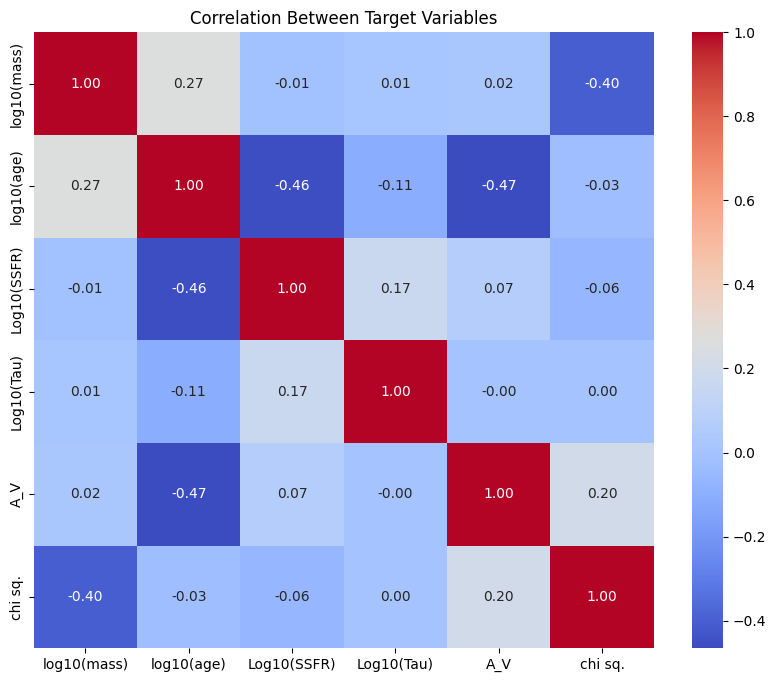

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered_multi[target_variables].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Target Variables")
plt.show()